In [2]:
!pip install alpha_vantage

In [5]:
!pip install yfinance

In [6]:
import yfinance as yf
import datetime

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=6*365)

data = yf.download('AAPL', start=start_date, end=end_date)

closing_data = data[['Adj Close']]

print(closing_data)

[*********************100%%**********************]  1 of 1 completed
             Adj Close
Date                  
2018-01-10   41.202778
2018-01-11   41.436821
2018-01-12   41.864708
2018-01-16   41.651951
2018-01-17   42.339882
...                ...
2024-01-03  184.250000
2024-01-04  181.910004
2024-01-05  181.179993
2024-01-08  185.559998
2024-01-09  184.770004

[1509 rows x 1 columns]


In [10]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

api_key = '3URJUDHTA41SYUY3'
#api_key = '562TZIDUFEFZ5YA8'

ts = TimeSeries(key=api_key, output_format='pandas')

symbol = 'AAPL'
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
closing_data = data['4. close']
closing_data.name = 'ClosingPrice'


In [ ]:
from alpha_vantage.fundamentaldata import FundamentalData

fd = FundamentalData(key=api_key)
symbol = 'AAPL'
# Get company overview
overview_data, meta_data = fd.get_company_overview(symbol=symbol)

# Get income statement data
income_statement_data, meta_data = fd.get_income_statement_quarterly(symbol=symbol)

# Get balance sheet
balance_sheet_data, meta_data = fd.get_balance_sheet_quarterly(symbol=symbol)

# Get cash flow data
cash_flow_data, meta_data = fd.get_cash_flow_quarterly(symbol=symbol)


In [ ]:
import pandas as pd

numeric_fields = [
    'MarketCapitalization', 'EBITDA', 'PERatio', 'PEGRatio', 'BookValue',
    'DividendPerShare', 'DividendYield', 'EPS', 'RevenuePerShareTTM',
    'ProfitMargin', 'OperatingMarginTTM', 'ReturnOnAssetsTTM',
    'ReturnOnEquityTTM', 'RevenueTTM', 'GrossProfitTTM', 'DilutedEPSTTM',
    'QuarterlyEarningsGrowthYOY', 'QuarterlyRevenueGrowthYOY',
    'AnalystTargetPrice', 'TrailingPE', 'ForwardPE', 'PriceToSalesRatioTTM',
    'PriceToBookRatio', 'EVToRevenue', 'EVToEBITDA', 'Beta',
    '52WeekHigh', '52WeekLow', '50DayMovingAverage', '200DayMovingAverage',
    'SharesOutstanding'
]

# Convert necessary fields to numeric
for field in numeric_fields:
    if field in overview_data:
        overview_data[field] = pd.to_numeric(overview_data[field], errors='coerce')

for col in income_statement_data.columns:
    if col not in ['fiscalDateEnding', 'reportedCurrency']:
        income_statement_data[col] = pd.to_numeric(income_statement_data[col], errors='coerce')

for col in balance_sheet_data.columns:
    if col not in ['fiscalDateEnding', 'reportedCurrency']:
        balance_sheet_data[col] = pd.to_numeric(balance_sheet_data[col], errors='coerce')

for col in cash_flow_data.columns:
    if col not in ['fiscalDateEnding', 'reportedCurrency']:
        cash_flow_data[col] = pd.to_numeric(cash_flow_data[col], errors='coerce')


In [ ]:
current_ratio = balance_sheet_data['totalCurrentAssets'] / balance_sheet_data['totalCurrentLiabilities']
quick_ratio = (balance_sheet_data['totalCurrentAssets'] - balance_sheet_data['inventory']) / balance_sheet_data['totalCurrentLiabilities']
debt_equity_ratio = balance_sheet_data['totalLiabilities'] / balance_sheet_data['totalShareholderEquity']
gross_margin_ratio = income_statement_data['grossProfit'] / income_statement_data['totalRevenue']
operating_margin_ratio = income_statement_data['operatingIncome'] / income_statement_data['totalRevenue']
net_profit_margin = income_statement_data['netIncome'] / income_statement_data['totalRevenue']
roa = income_statement_data['netIncome'] / balance_sheet_data['totalAssets']
roe = income_statement_data['netIncome'] / balance_sheet_data['totalShareholderEquity']
eps = income_statement_data['netIncome'] / balance_sheet_data['commonStockSharesOutstanding']
'''price_to_sales_ratio = overview_data['MarketCapitalization'] / overview_data['RevenueTTM']
gross_profit_margin = overview_data['GrossProfitTTM'] / overview_data['RevenueTTM']
operating_margin_ttm = overview_data['OperatingMarginTTM']
profit_margin_ttm = overview_data['ProfitMargin']
roa_ttm = overview_data['ReturnOnAssetsTTM']
roe_ttm = overview_data['ReturnOnEquityTTM']
earnings_growth_yoy = overview_data['QuarterlyEarningsGrowthYOY']
revenue_growth_yoy = overview_data['QuarterlyRevenueGrowthYOY']
beta = overview_data['Beta']
price_range_52week = overview_data['52WeekHigh'] - overview_data['52WeekLow']
moving_average_50 = overview_data['50DayMovingAverage']
moving_average_200 = overview_data['200DayMovingAverage']
dividend_payout_ratio = overview_data['DividendPerShare'] / overview_data['EPS']
retention_ratio = 1 - dividend_payout_ratio
forward_pe = overview_data['ForwardPE']
peg_ratio = overview_data['PERatio'] / overview_data['PEGRatio']'''

rd_to_revenue_ratio = income_statement_data['researchAndDevelopment'] / income_statement_data['totalRevenue']
net_income_to_fcf_ratio = income_statement_data['netIncome'] / (cash_flow_data['operatingCashflow'] - cash_flow_data['capitalExpenditures'])
operating_cash_to_sales_ratio = cash_flow_data['operatingCashflow'] / income_statement_data['totalRevenue']
days_inventory_outstanding = (balance_sheet_data['inventory'] / income_statement_data['costofGoodsAndServicesSold']) * 365
days_sales_outstanding = (balance_sheet_data['currentNetReceivables'] / income_statement_data['totalRevenue']) * 365
days_payable_outstanding = (balance_sheet_data['currentAccountsPayable'] / income_statement_data['costofGoodsAndServicesSold']) * 365
cash_conversion_cycle = days_inventory_outstanding + days_sales_outstanding - days_payable_outstanding
ebitda_to_interest_expense = overview_data['EBITDA'] / income_statement_data['interestExpense']
long_term_debt_to_assets_ratio = balance_sheet_data['longTermDebt'] / balance_sheet_data['totalAssets']
equity_multiplier = balance_sheet_data['totalAssets'] / balance_sheet_data['totalShareholderEquity']
dividend_coverage_ratio = income_statement_data['netIncome'] / (overview_data['DividendPerShare'] * overview_data['SharesOutstanding'])
sales_to_total_assets_ratio = income_statement_data['totalRevenue'] / balance_sheet_data['totalAssets']
adjusted_roa = (income_statement_data['netIncome'] / balance_sheet_data['totalAssets']) * equity_multiplier
#growth_adjusted_peg_ratio = overview_data['PEGRatio'] / overview_data['QuarterlyRevenueGrowthYOY']
capex_to_operating_cash_ratio = cash_flow_data['capitalExpenditures'] / cash_flow_data['operatingCashflow']
inventory_turnover_days = 365 / (income_statement_data['costofGoodsAndServicesSold'] / balance_sheet_data['inventory'])
asset_efficiency_ratio = income_statement_data['totalRevenue'] / (balance_sheet_data['totalAssets'].shift(1))
rd_efficiency = income_statement_data['totalRevenue'] / income_statement_data['researchAndDevelopment']

In [ ]:
#closing_data.name = 'ClosingPrice'
#final_data = closing_data

ratio_datasets = {
    'current_ratio': current_ratio, 'quick_ratio': quick_ratio, 'debt_equity_ratio': debt_equity_ratio,
    'gross_margin_ratio': gross_margin_ratio, 'operating_margin_ratio': operating_margin_ratio, 'net_profit_margin': net_profit_margin,
    'roa': roa, 'roe': roe, 'eps': eps,
    'rd_to_revenue_ratio': rd_to_revenue_ratio, 'net_income_to_fcf_ratio': net_income_to_fcf_ratio,
    'operating_cash_to_sales_ratio': operating_cash_to_sales_ratio, 'days_inventory_outstanding': days_inventory_outstanding,
    'days_sales_outstanding': days_sales_outstanding, 'days_payable_outstanding': days_payable_outstanding, 'cash_conversion_cycle': cash_conversion_cycle,
    'ebitda_to_interest_expense': ebitda_to_interest_expense, 'long_term_debt_to_assets_ratio': long_term_debt_to_assets_ratio,
    'equity_multiplier': equity_multiplier, 'dividend_coverage_ratio': dividend_coverage_ratio, 'sales_to_total_assets_ratio': sales_to_total_assets_ratio,
    'adjusted_roa': adjusted_roa, 'capex_to_operating_cash_ratio': capex_to_operating_cash_ratio,
    'inventory_turnover_days': inventory_turnover_days, 'asset_efficiency_ratio': asset_efficiency_ratio, 'rd_efficiency': rd_efficiency
}

final_data = pd.DataFrame(index=pd.date_range(start=balance_sheet_data['fiscalDateEnding'].min(), end=closing_data.index.max(), freq='D'))
final_data['ClosingPrice'] = closing_data.reindex(final_data.index).ffill()

for ratio_name, ratio_dataset in ratio_datasets.items():
    ratio_dataset.index = pd.to_datetime(balance_sheet_data['fiscalDateEnding'])
    ratio_dataset = ratio_dataset.reindex(final_data.index).ffill()
    ratio_dataset.name = ratio_name
    final_data = final_data.join(ratio_dataset, how='left')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

final_data = final_data.dropna()


X = final_data.drop(['ClosingPrice'], axis=1)
y = final_data['ClosingPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 68.55952086924482


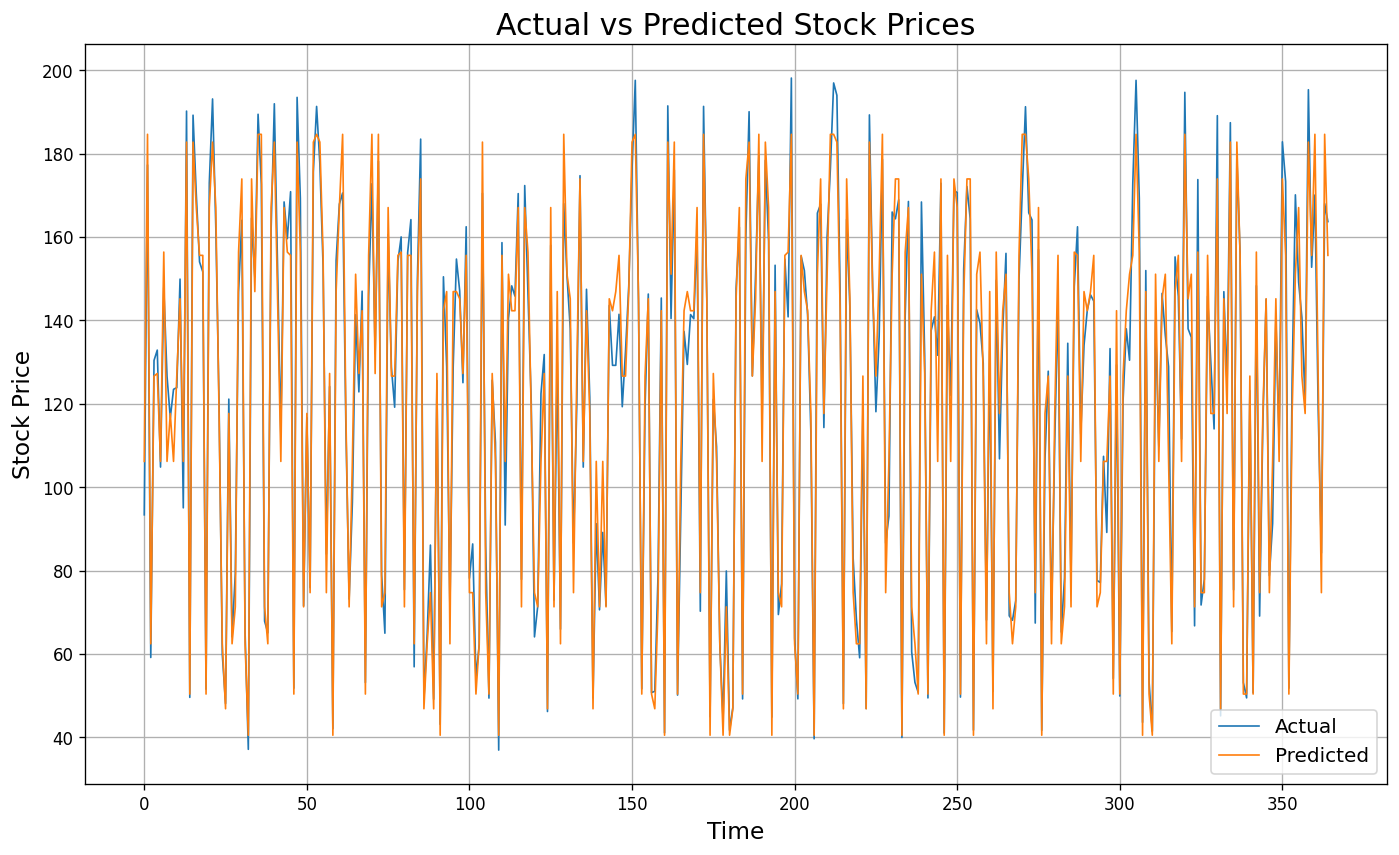

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 8), dpi=120)
plt.plot(y_test.values, label='Actual', linewidth=1)
plt.plot(y_pred, label='Predicted', linewidth=1)
plt.title('Actual vs Predicted Stock Prices', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
importances = model.feature_importances_

# Print the feature importance
for i, v in enumerate(importances):
    print(f"Feature: {X.columns[i]}, Score: {v}")

Feature: current_ratio, Score: 0.04649870824692671
Feature: quick_ratio, Score: 0.04302702799348845
Feature: debt_equity_ratio, Score: 0.3917556797150476
Feature: gross_margin_ratio, Score: 0.04940268036072187
Feature: operating_margin_ratio, Score: 0.0006701973100967141
Feature: net_profit_margin, Score: 0.0008120871550776833
Feature: roa, Score: 0.0009150720641073487
Feature: roe, Score: 0.0006758666673428088
Feature: eps, Score: 0.04939890181214647
Feature: rd_to_revenue_ratio, Score: 0.0006888423544102677
Feature: net_income_to_fcf_ratio, Score: 0.002487975885702493
Feature: operating_cash_to_sales_ratio, Score: 0.0004742737255583646
Feature: days_inventory_outstanding, Score: 0.0013083069389255276
Feature: days_sales_outstanding, Score: 0.0008541558320395446
Feature: days_payable_outstanding, Score: 0.0010885906924424044
Feature: cash_conversion_cycle, Score: 0.0008378101722127311
Feature: ebitda_to_interest_expense, Score: 0.010945995355805517
Feature: long_term_debt_to_assets_ra

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

final_data.sort_index(inplace=True)

final_data.dropna(inplace=True)

X = final_data.drop(['ClosingPrice'], axis=1)
y = final_data['ClosingPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 68.29780609557386


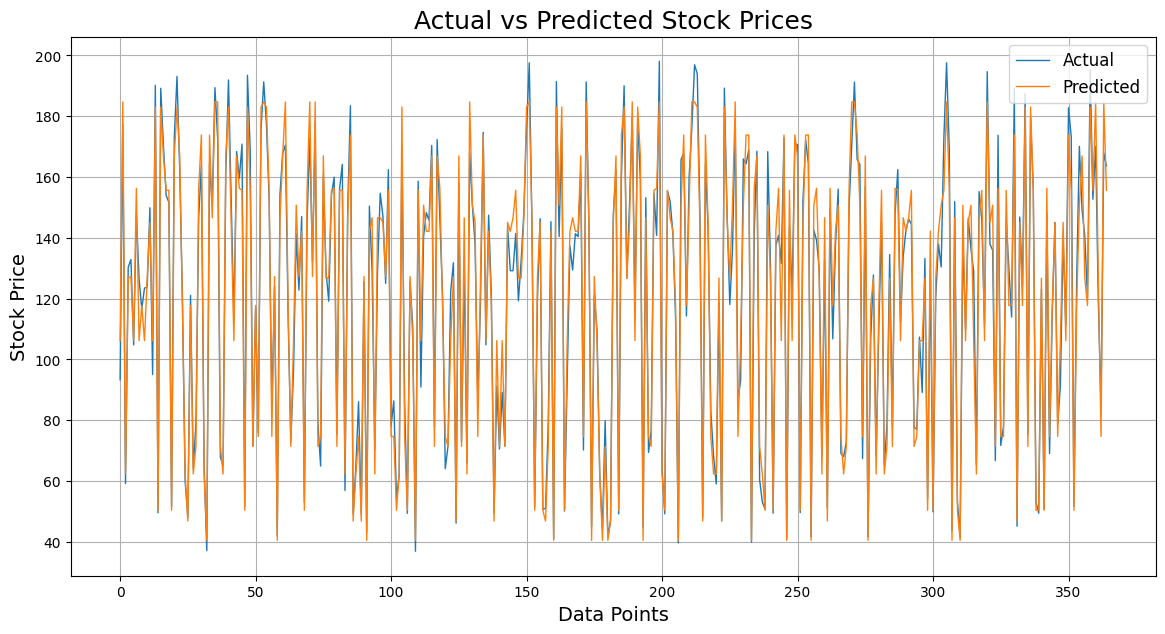

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs predicted values for visualization.
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', linewidth=1)
plt.plot(y_pred, label='Predicted', linewidth=1)
plt.title('Actual vs Predicted Stock Prices', fontsize=18)
plt.xlabel('Data Points', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()